# Import relevant libraries and load the data

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the train data
raw_train = pd.read_csv('train.csv')
raw_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Describe of train data
raw_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Information of train data
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Preprocessing

In [5]:
# Check if any duplicated train values
raw_train[raw_train.duplicated]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [6]:
# Unique values in each columns
count_unique = {col: len(raw_train[col].unique()) for col in raw_train.columns}
count_unique

{'age': 77,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 7168,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 12,
 'duration': 1573,
 'campaign': 48,
 'pdays': 559,
 'previous': 41,
 'poutcome': 4,
 'y': 2}

In [7]:
# Create function to preprocess the data (also use for test later)
def preprocess(data):
    # Convert type of Month column
    data['month'] = pd.to_datetime(data['month'], format='%b').dt.month

    # Convert target value into integer
    data['y'] = data['y'].map({'yes': 1, 'no': 0})

    # Convert string columns into category
    object_columns = data.select_dtypes(include='object').columns
    data[object_columns] = data[object_columns].astype('category')

    # Display the data postprocessing
    display(data.head(10))

In [8]:
preprocess(raw_train)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,5,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,5,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,5,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,5,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,5,55,1,-1,0,unknown,0


In [9]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  int64   
dtypes: category(8), int32(1), int64(8)
memory usage: 3.3 MB


In [10]:
# Separate data into categorical and numerical columns
cat_col = raw_train.select_dtypes(include='category').columns.to_list()
num_col = raw_train.select_dtypes(include='int').columns.to_list()
print(f'Categorical Columns: {cat_col}')
print(f'Numerical Columns: {num_col}')

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
Numerical Columns: ['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y']


# Exploring Data Analysis

## Build functions to EDA variables

In [11]:
# Histogram combine with Boxplot to display numerical variables

def num_eda(feature, figsize=(12, 6), bins=None, color=None):
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2,  # numbers of rows
                                          sharex = True,  # rows have the same x scale
                                          gridspec_kw = {"height_ratios": (.25, .75)},  # adjust the height ratios 
                                          figsize=figsize)

    # Boxplot on top
    sns.boxplot(x=raw_train[feature], ax=ax_box, showmeans=True,  # Show mean in boxplot
                meanprops={'marker':'o', 'markerfacecolor':'red'}, color=color)
    
    # Histogram under boxplot
    if bins:
        sns.distplot(raw_train[feature], kde=True, ax=ax_hist, bins=bins, color=color)
    else:
        sns.distplot(raw_train[feature], kde=True, ax=ax_hist, color=color)
    
    ax_hist.axvline(np.mean(raw_train[feature]), color='red', linestyle='--')
    ax_hist.axvline(np.median(raw_train[feature]), color='black', linestyle='-')

In [12]:
# Display distributions and Boxplots of numerical variables, with and without outliers
def num_with_target(x, bins=30, target='y'):
    fig, axs = plt.subplots(2,2,figsize=(12,10))

    axs[0,0].set_title('Distribution of Yes')
    sns.histplot(raw_train[(raw_train[target] == 1)][x], bins=bins, kde=True, ax=axs[0,0], color='#bcdaaa')
        
    axs[0,1].set_title('Distribution of No')
    sns.histplot(raw_train[(raw_train[target] == 0)][x], bins=bins, kde=True, ax=axs[0,1], color='#ebbc84')
        
    axs[1,0].set_title('Boxplot of Yes')
    sns.boxplot(x=raw_train[target], y=raw_train[x], ax=axs[1,0], palette='Spectral')
    
    axs[1,1].set_title('Boxplot of Yes - Without outliers')
    sns.boxplot(x=raw_train[target], y=raw_train[x], ax=axs[1,1], showfliers=False, palette='Spectral')
    
    plt.tight_layout()
    plt.show()

In [13]:
# Countplot to display categorical variables
def dis_eda(feature, palette=None):
    plt.figure(figsize=(12,6))
    
    ax=sns.countplot(x=raw_train[feature], palette=(palette if palette else 'mako'))
    plt.ylabel('Frequency', fontsize=17)
    plt.gca().xaxis.label.set_size(17)  # Adjust size of xlabel without having its name
    
    total = len(raw_train[feature])  # sum of feature
    for i in ax.patches:  # get xy, width, height of the plot
        percentage = 100 * i.get_height()/total 
        percentage_label = f"{percentage:.1f}%"
        x = i.get_x() + i.get_width() / 2 - 0.05  # x location of percentage label
        y = i.get_y() + i.get_height()  # y location of percentage label
        ax.annotate(percentage_label, (x, y), size=13)  # adjust the annotate
        
    plt.show()

In [14]:
# Stacked bar chart to display target's ratio in categorical variables
def dis_with_target(x, y=None, show_crosstab=None, color=None):
    if y:
        info = pd.crosstab(raw_train[x], raw_train[y])
        info['% - 0'] = round(info[0]/(info[0] + info[1]) * 100, 2)
        info['% - 1'] = round(info[1]/(info[0] + info[1]) * 100, 2)
        if show_crosstab:    
            display(info)
        fig, axs = plt.subplots(ncols = 2, figsize=(12,5))
        
        info.iloc[:,:2].plot(kind='bar', stacked=True, ax=axs[0], color=(color if color else ['tab:red', 'tab:green'])).set(xlabel=None, ylabel=None)
        axs[0].set_title(f'Distribution of {x}', fontsize=15, fontweight='bold')
        
        pd.crosstab(raw_train[x], raw_train[y], normalize='index').plot(kind='bar', stacked=True, 
                                                                        ax=axs[1], color=(color if color else ['tab:red', 'tab:green'])).set(xlabel=None, ylabel=None)
        axs[1].set_title('Ratio of Loan Status', fontsize=15, fontweight='bold')

    else:
        info = pd.crosstab(raw_train[x], raw_train['y'])
        info['% - 0'] = round(info[0]/(info[0] + info[1]) * 100, 2)
        info['% - 1'] = round(info[1]/(info[0] + info[1]) * 100, 2)
        if show_crosstab:    
            display(info)
        fig, axs = plt.subplots(ncols = 2, figsize=(12,5))
        
        info.iloc[:,:2].plot(kind='bar', stacked=True, ax=axs[0], color=(color if color else ['tab:red', 'tab:green'])).set(xlabel=None, ylabel=None)
        axs[0].set_title(f'Distribution of {x}', fontsize=15, fontweight='bold')
        
        pd.crosstab(raw_train[x], raw_train['y'], normalize='index').plot(kind='bar', stacked=True, 
                                                                        ax=axs[1], color=(color if color else ['tab:red', 'tab:green'])).set(xlabel=None, ylabel=None)
        axs[1].set_title('Ratio of Loan Status', fontsize=15, fontweight='bold')

    plt.show()

## Numerical Columns

### Age

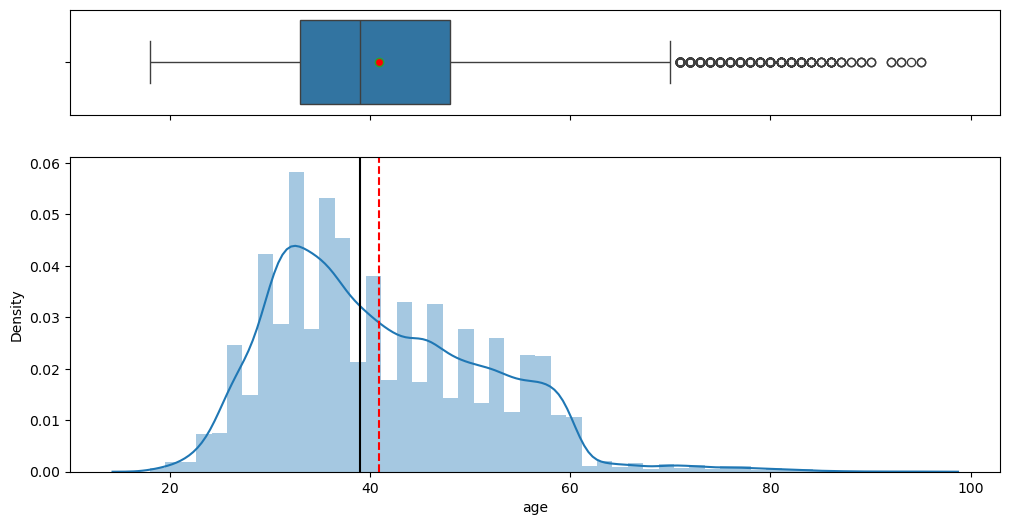

In [15]:
num_eda('age')

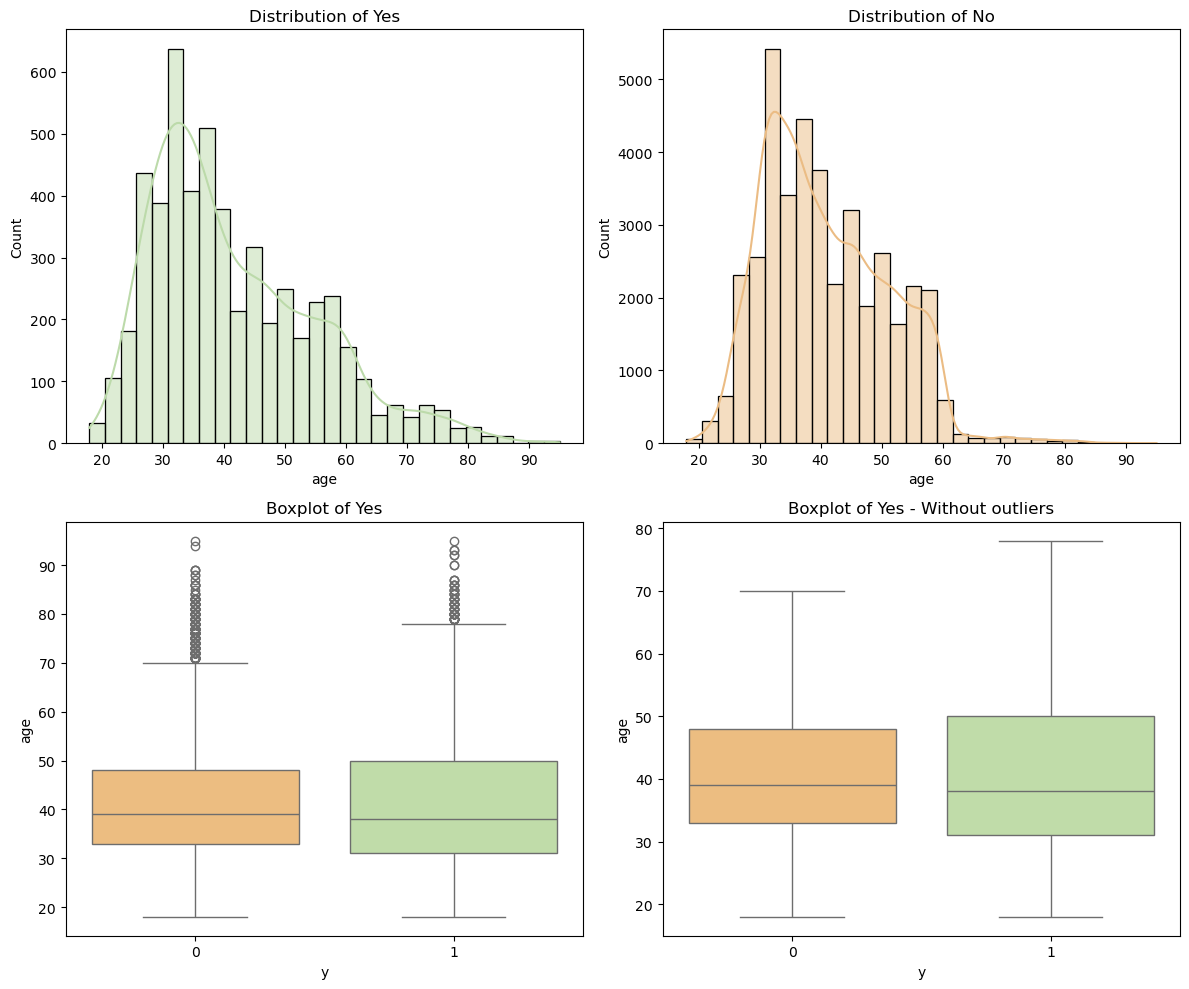

In [16]:
num_with_target('age')

### Balance

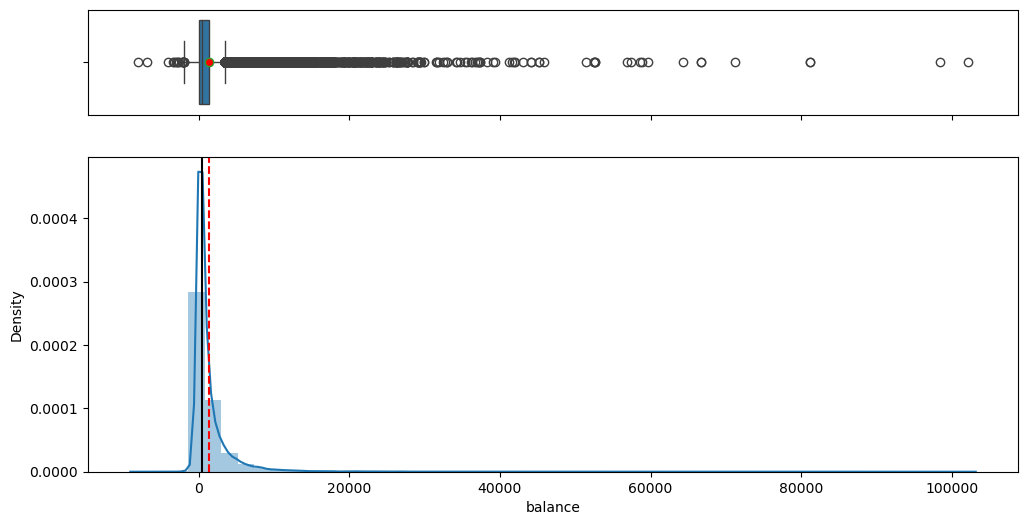

In [17]:
num_eda('balance')

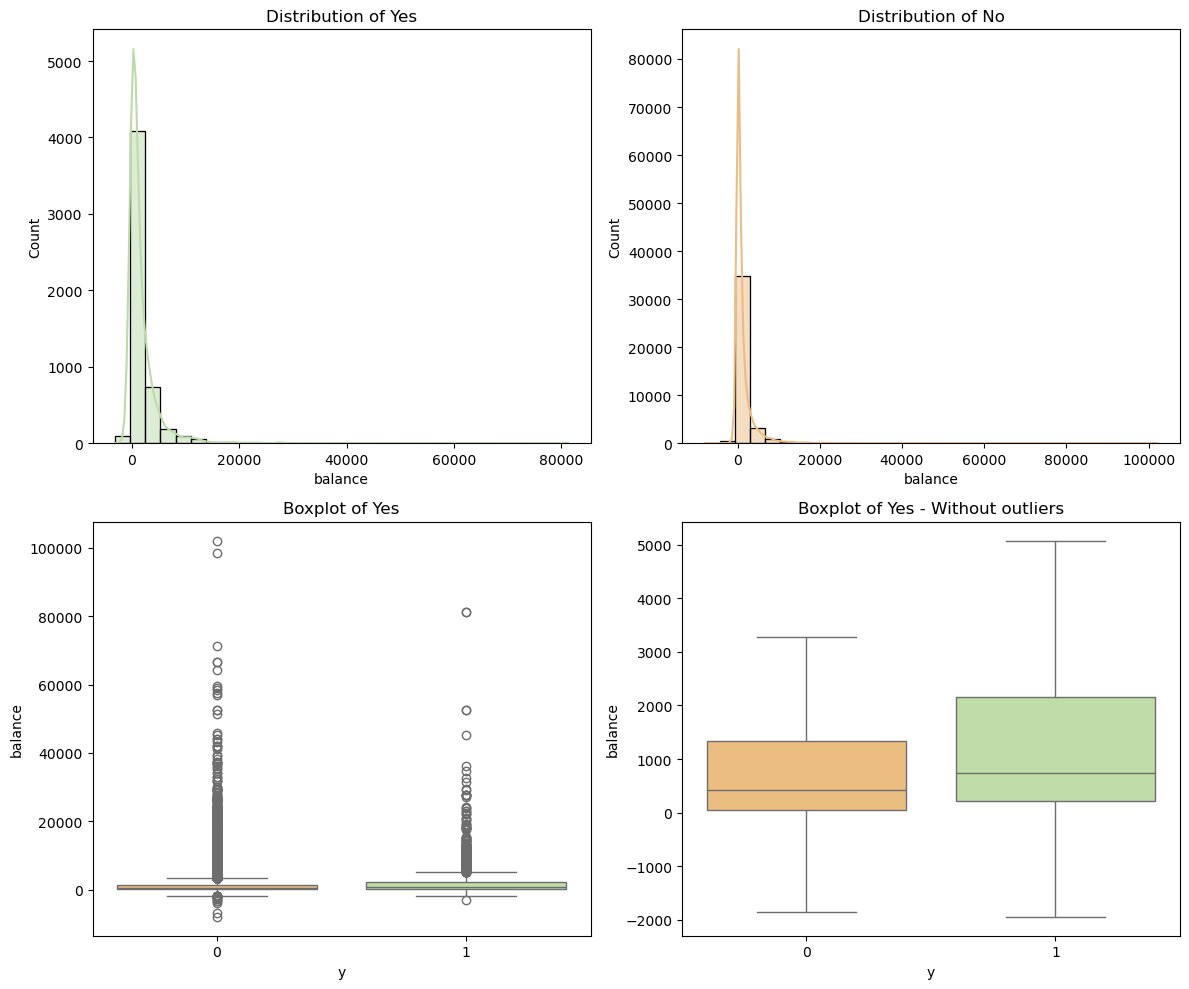

In [18]:
num_with_target('balance')

### Duration

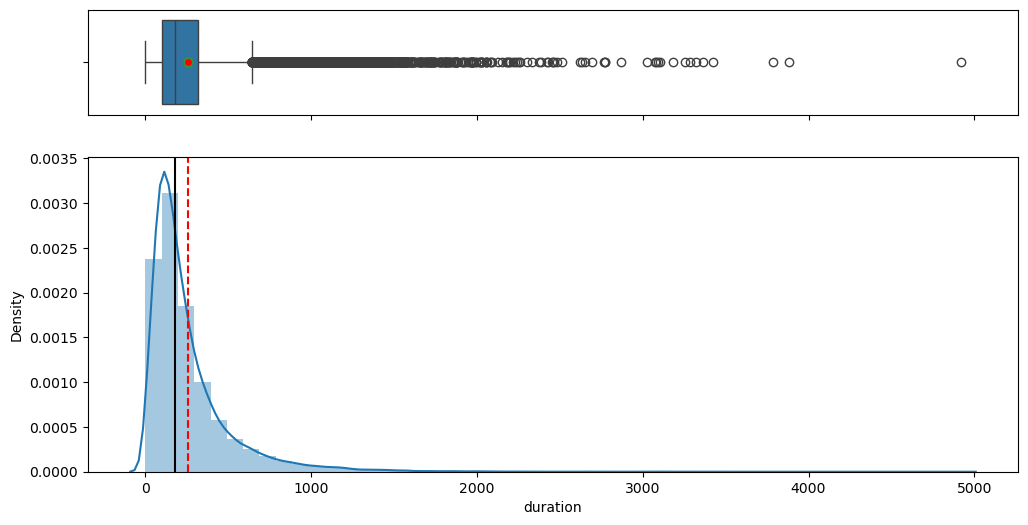

In [19]:
num_eda('duration')

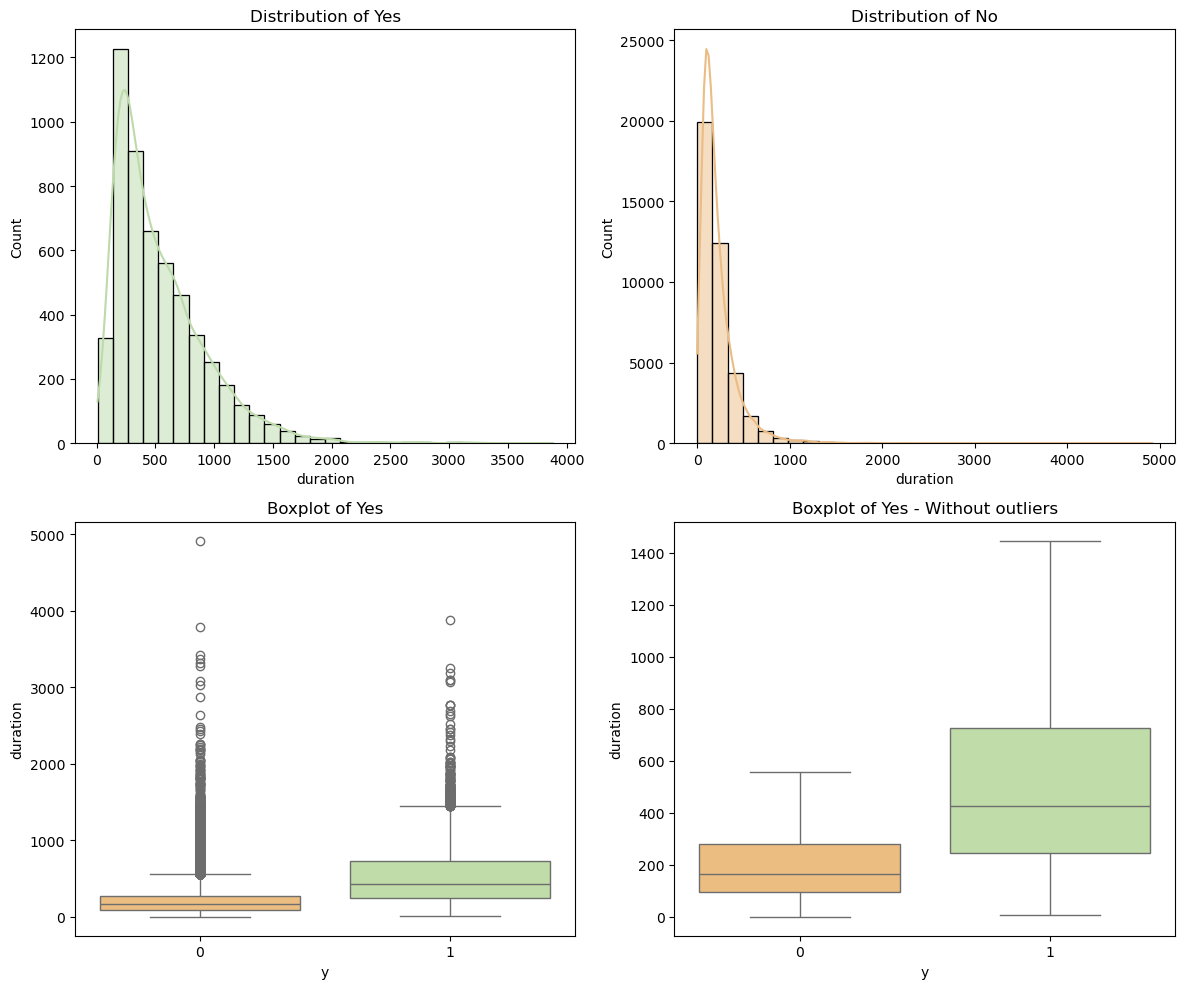

In [20]:
num_with_target('duration')

### Campaign

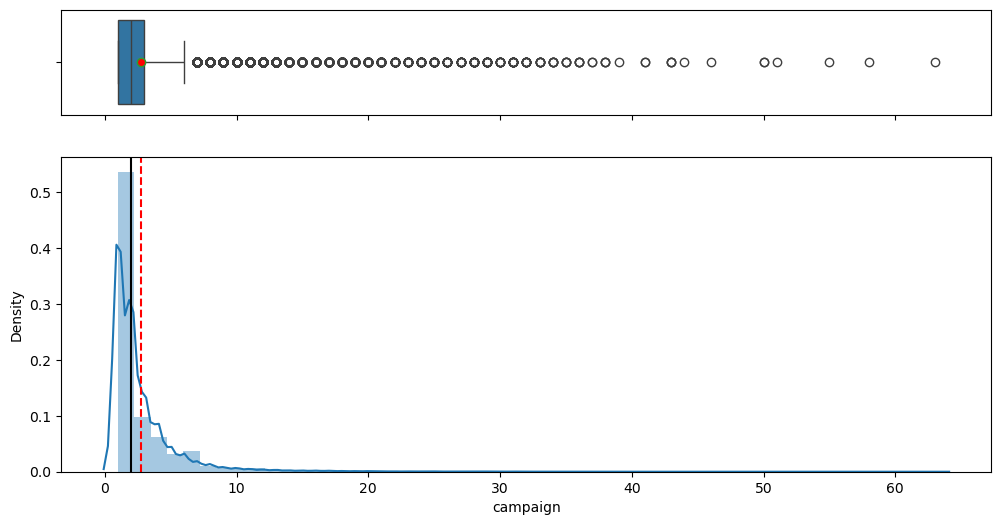

In [21]:
num_eda('campaign')

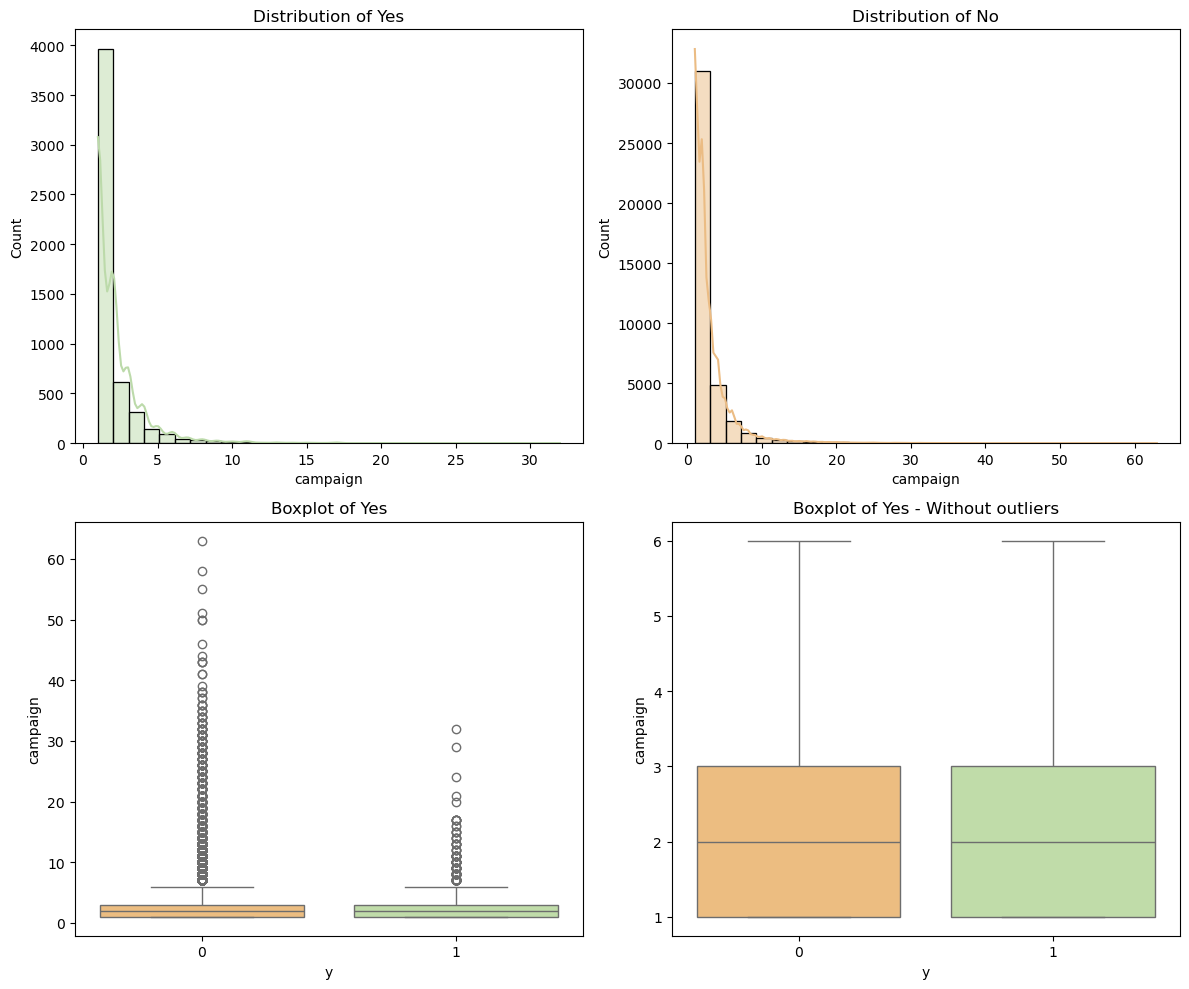

In [22]:
num_with_target('campaign')

### Previous

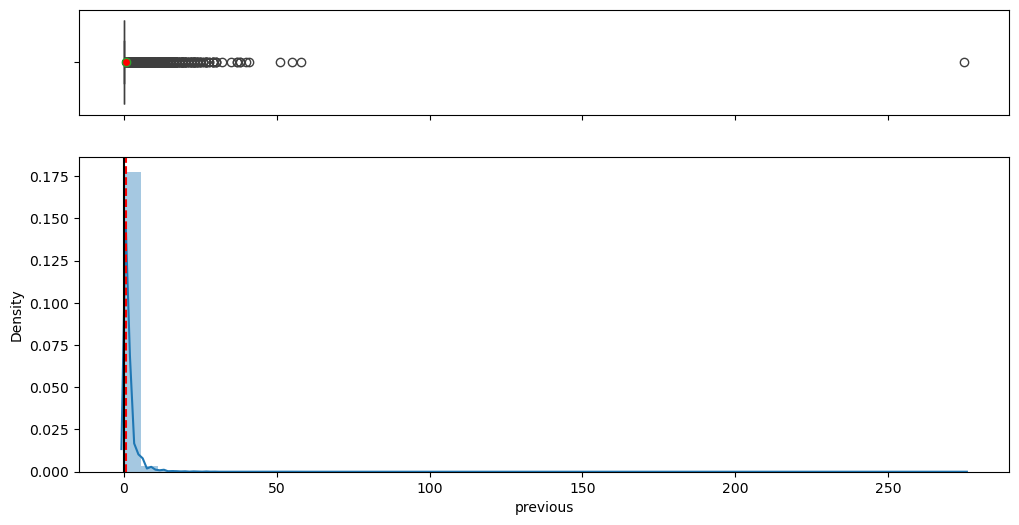

In [23]:
num_eda('previous')

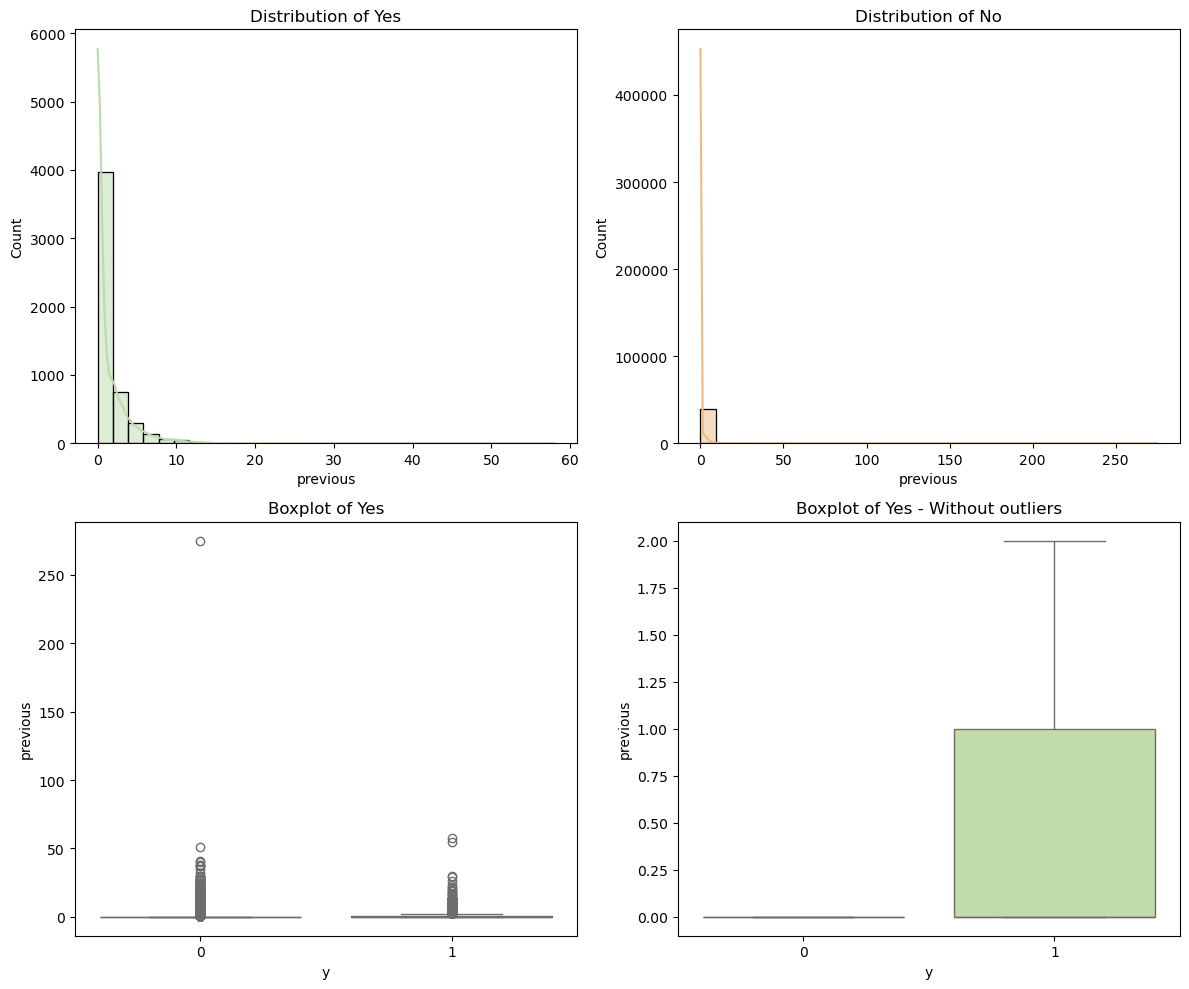

In [24]:
num_with_target('previous')

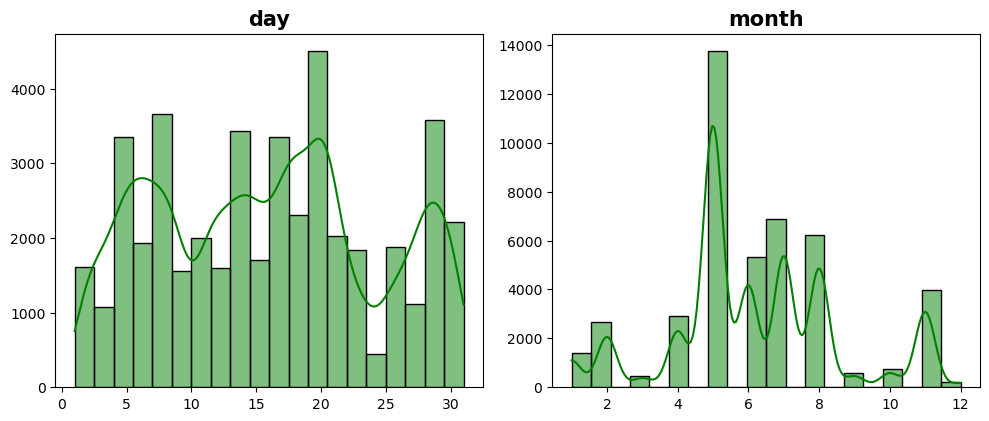

In [25]:
# Histograms of Numerical columns
plt.figure(figsize=(10,8))
columns = ['day', 'month']

for i in columns:
    plt.subplot(2,2, columns.index(i)+1)
    sns.histplot(x=i, data=raw_train, kde=True, bins=20, color='green').set(xlabel=None, ylabel=None)
    plt.title(i, fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

### Correlations

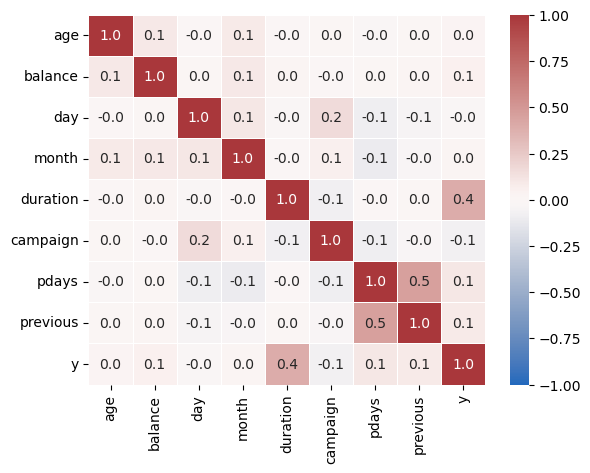

In [26]:
# Heatmap to show Numerical Correlations (Multicolinearity)
num_matrix = raw_train[num_col].corr()
sns.heatmap(data=num_matrix, cmap='vlag', annot=True, fmt='.1f', linewidth=0.5, vmin=-1, vmax=1)
plt.show()

## Categorical Columns

### Target

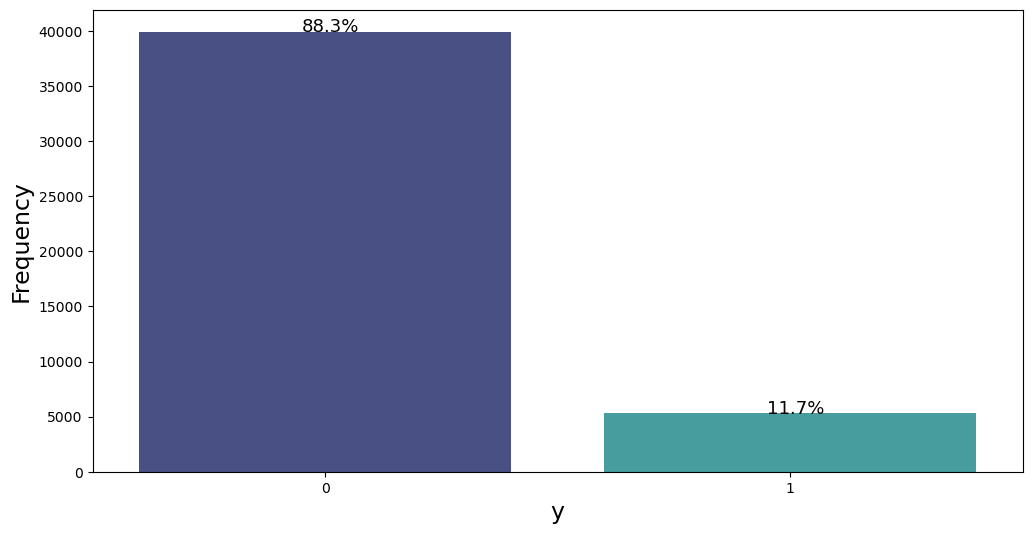

In [27]:
dis_eda('y')

### Marital

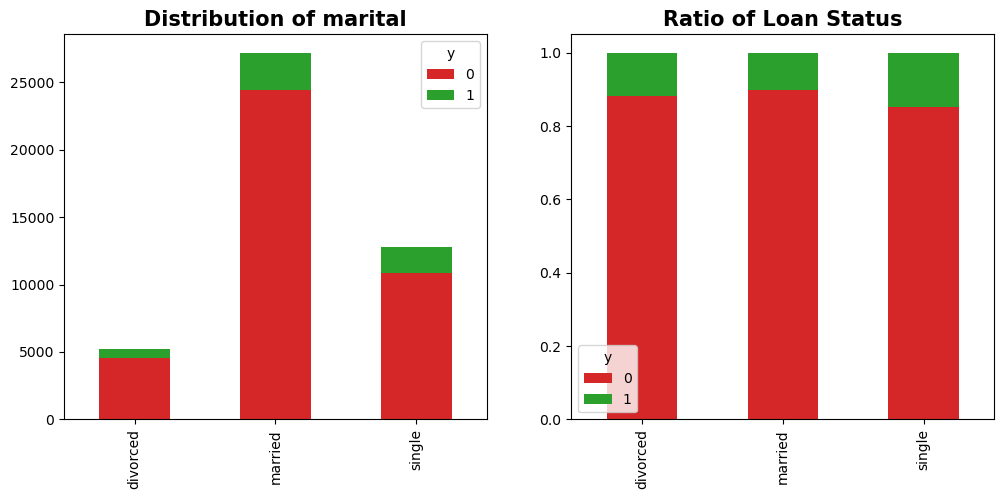

In [28]:
dis_with_target('marital')

### Education

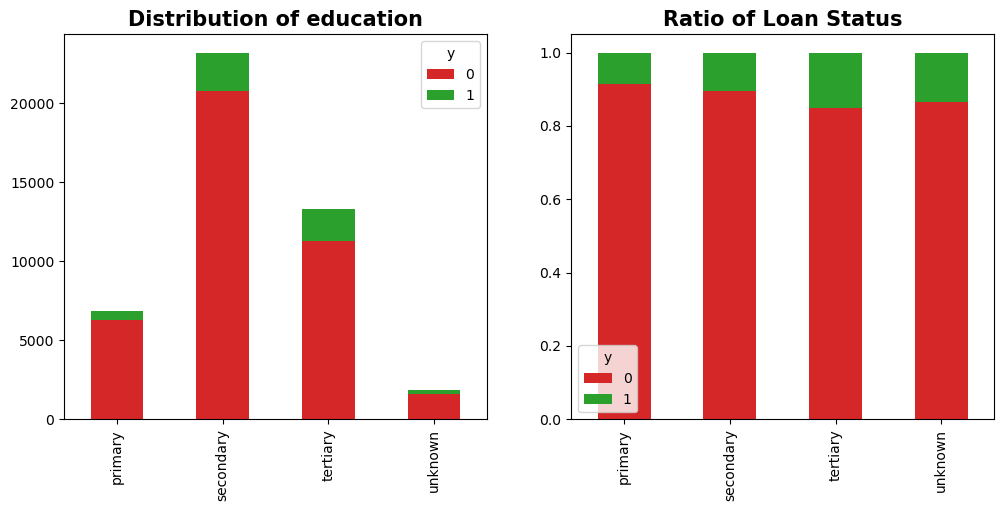

In [29]:
dis_with_target('education')

### Default

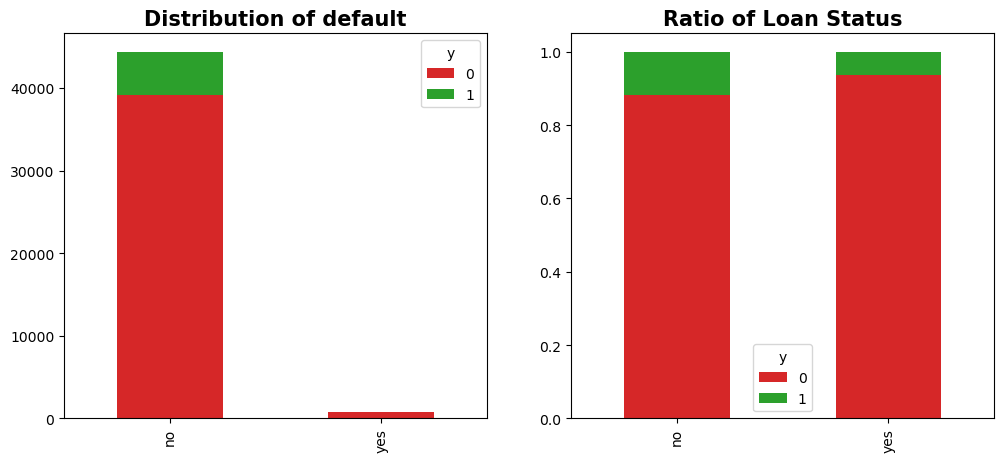

In [30]:
dis_with_target('default')

### Housing

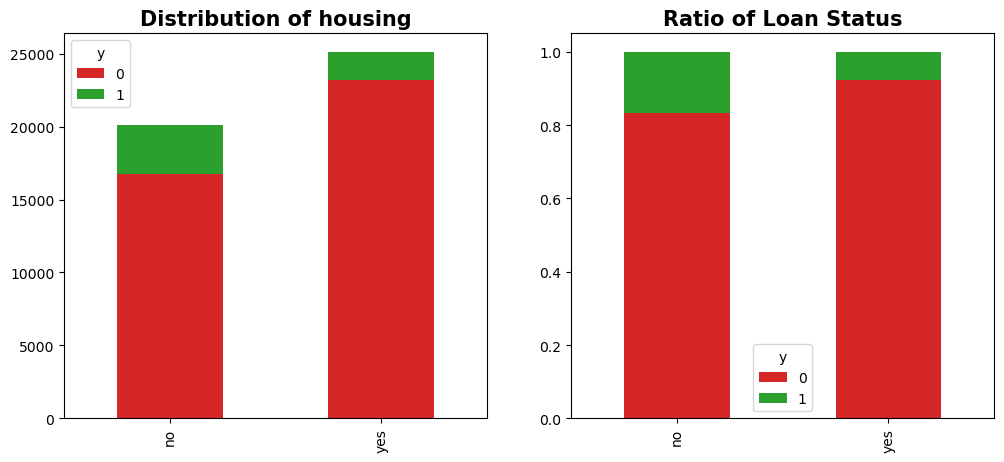

In [31]:
dis_with_target('housing')

### Loan

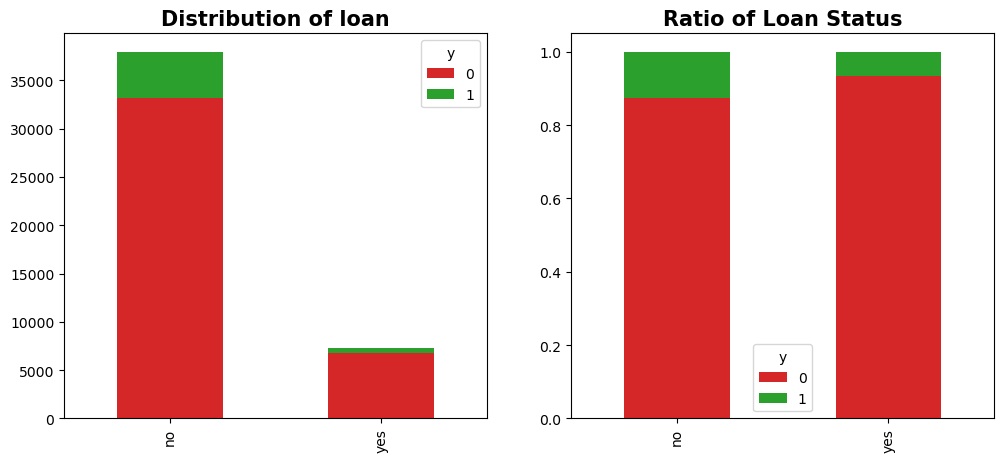

In [32]:
dis_with_target('loan')

### Contact

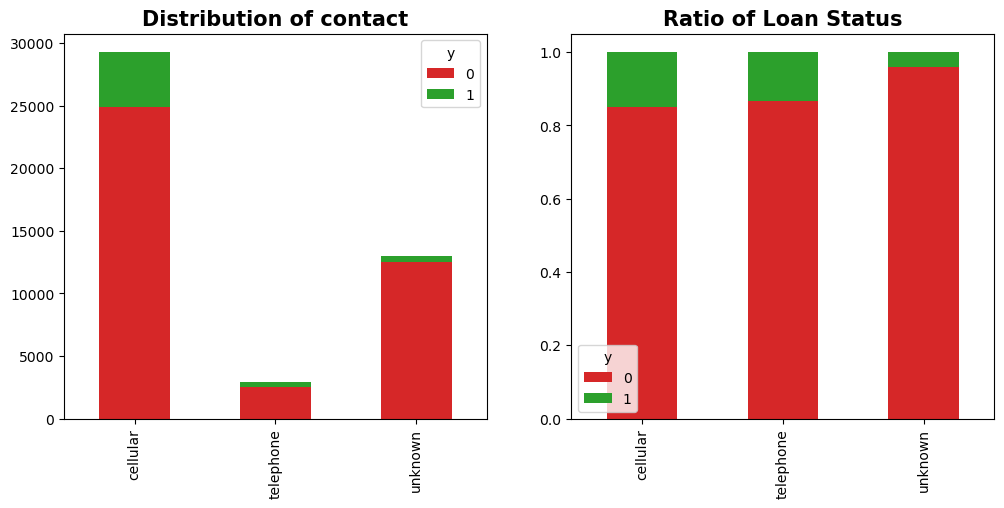

In [33]:
dis_with_target('contact')

### Poutcome

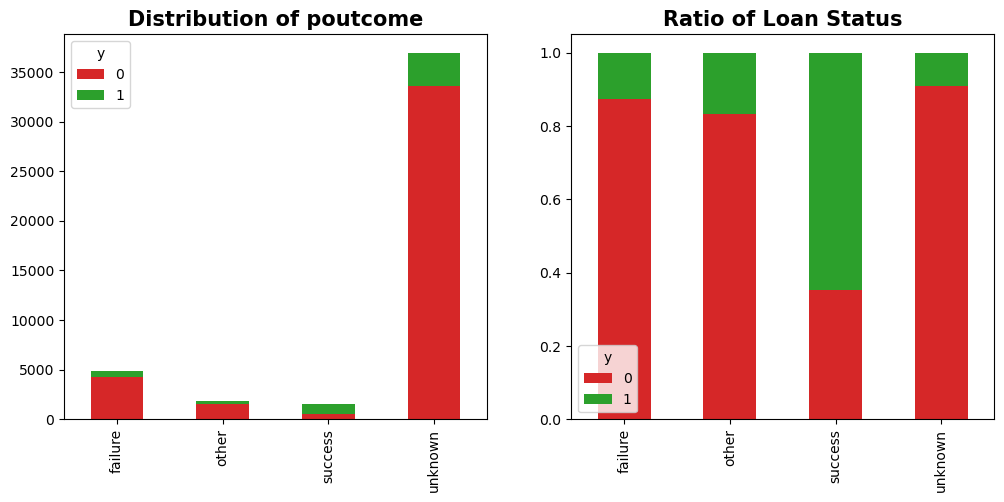

In [34]:
dis_with_target('poutcome')

### Job

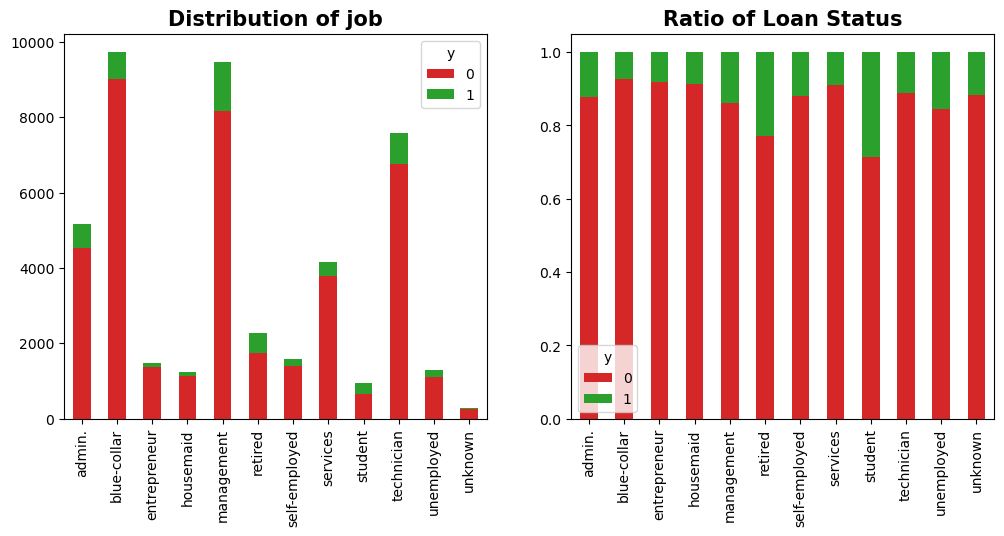

In [35]:
dis_with_target('job')

## Relationship Analysis

### Age and Balance

In [36]:
# Prepare for Age range table
sort_age = raw_train.groupby('age').agg(
    count = pd.NamedAgg(column='age', aggfunc='count'),
    sum_balance = pd.NamedAgg(column='balance', aggfunc='sum'),
    no_subcribe = pd.NamedAgg(column='y', aggfunc=lambda x: (x==0).sum()),
    yes_subcribe = pd.NamedAgg(column='y', aggfunc=lambda x: (x==1).sum())
).reset_index()
sort_age['age_range'] = pd.cut(sort_age['age'], bins=[0,30,45,60,100], 
                                labels=['under 30','31 to 45','46 to 60','over 60'], right=True)
sort_age

,age,count,sum_balance,no_subcribe,yes_subcribe,age_range
0,18,12,4469,5,7,under 30
1,19,35,18892,24,11,under 30
2,20,50,42097,35,15,under 30
3,21,79,68474,57,22,under 30
4,22,129,120693,89,40,under 30
...,...,...,...,...,...,...
72,90,2,713,0,2,over 60
73,92,2,1550,0,2,over 60
74,93,2,1550,0,2,over 60
75,94,1,1234,1,0,over 60


In [37]:
# Group by Age Range
age_analysis = sort_age.groupby('age_range').agg(
    count = pd.NamedAgg(column='count', aggfunc='sum'),
    avg_balance = pd.NamedAgg(column='sum_balance', aggfunc='mean'),
    no_subcribe = pd.NamedAgg(column='no_subcribe', aggfunc='sum'),
    yes_subcribe = pd.NamedAgg(column='yes_subcribe', aggfunc='sum')
).reset_index()
age_analysis['ratio'] = age_analysis['yes_subcribe']*100/(age_analysis['yes_subcribe']+age_analysis['no_subcribe'])
age_analysis

,age_range,count,avg_balance,no_subcribe,yes_subcribe,ratio
0,under 30,7030,5.515591e+05,5885,1145,16.287340
1,31 to 45,23733,2.011767e+06,21388,2345,9.880757
2,46 to 60,13260,1.404061e+06,11963,1297,9.781297
3,over 60,1188,9.358806e+04,686,502,42.255892


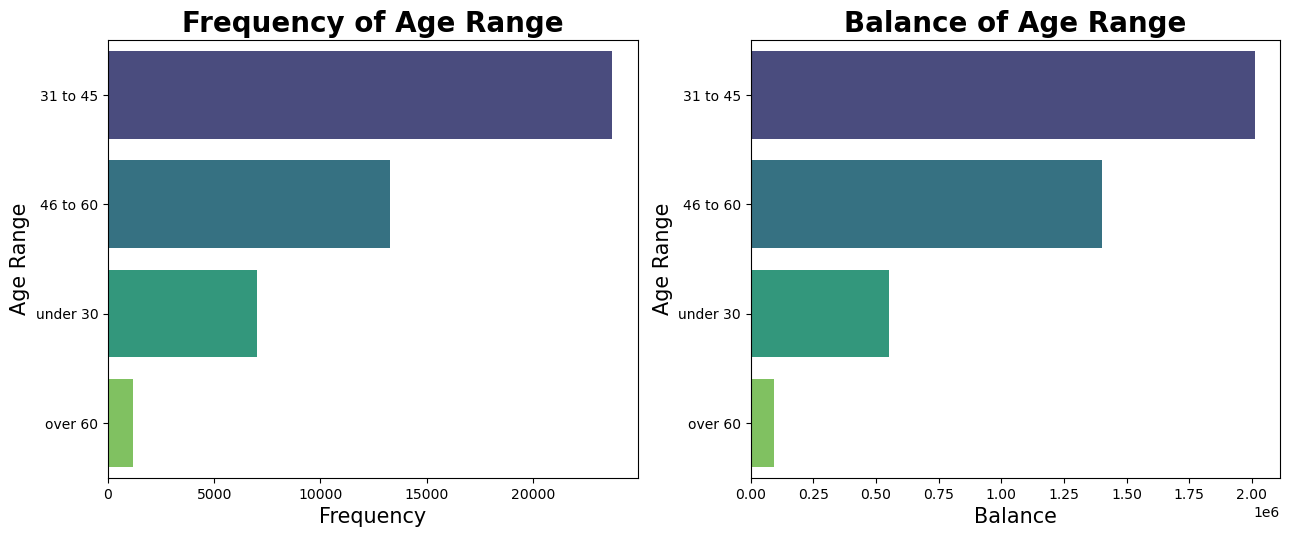

In [38]:
# Display job columns
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.barplot(y=age_analysis['age_range'], x=age_analysis['count'], 
            orient='h', errorbar=None,
            palette='viridis',
            order=age_analysis.sort_values('count', ascending=False)['age_range'])
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Age Range', fontsize=15)
plt.title('Frequency of Age Range', fontsize=20, fontweight='bold')

plt.subplot(2,2,2)
sns.barplot(y=age_analysis['age_range'], x=age_analysis['avg_balance'], 
            orient='h', errorbar=None,
            palette='viridis',
            order=age_analysis.sort_values('avg_balance', ascending=False)['age_range'])
plt.xlabel('Balance', fontsize=15)
plt.ylabel('Age Range', fontsize=15)
plt.title('Balance of Age Range', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

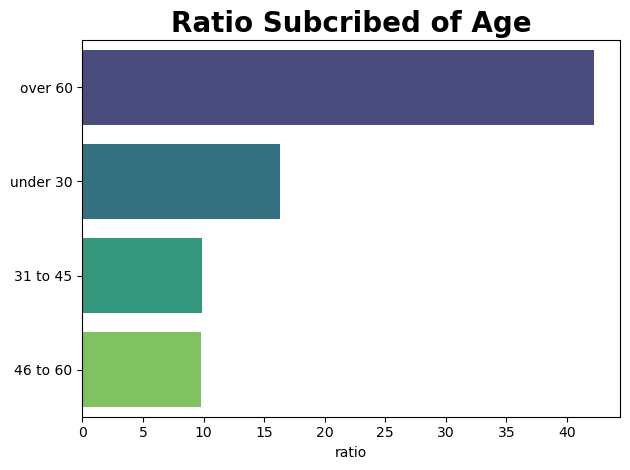

In [39]:
# Ratio Subcribed of Age
sns.barplot(data=age_analysis, x='ratio', y=age_analysis['age_range'], 
            orient='h', errorbar=None, palette='viridis',
            order=age_analysis.sort_values('ratio', ascending=False)['age_range']).set(ylabel=None)
plt.title('Ratio Subcribed of Age', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

### Jobs and Education

In [40]:
# Group by Job and Education
job_edu = raw_train.groupby(['job', 'education']).size().unstack(fill_value=0)
job_edu

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


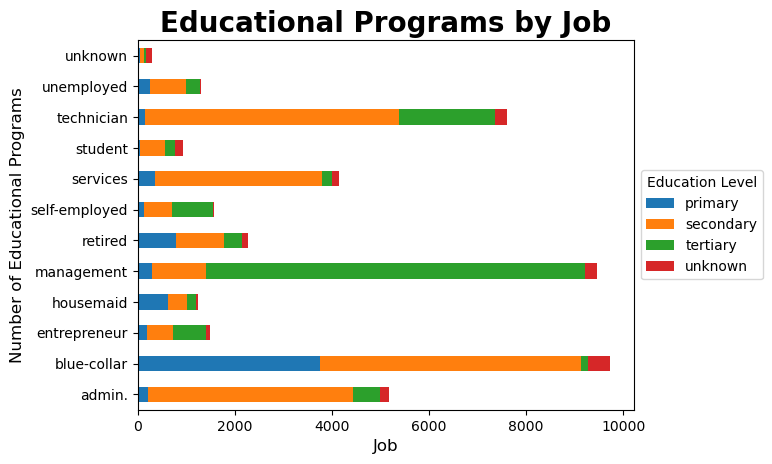

In [41]:
# Count Education by Job
job_edu.plot(kind='barh', stacked=True)
plt.title('Educational Programs by Job', fontsize=20, fontweight='bold')
plt.xlabel('Job', fontsize=12)
plt.ylabel('Number of Educational Programs', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Education Level', loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

### Education, Job with Balance

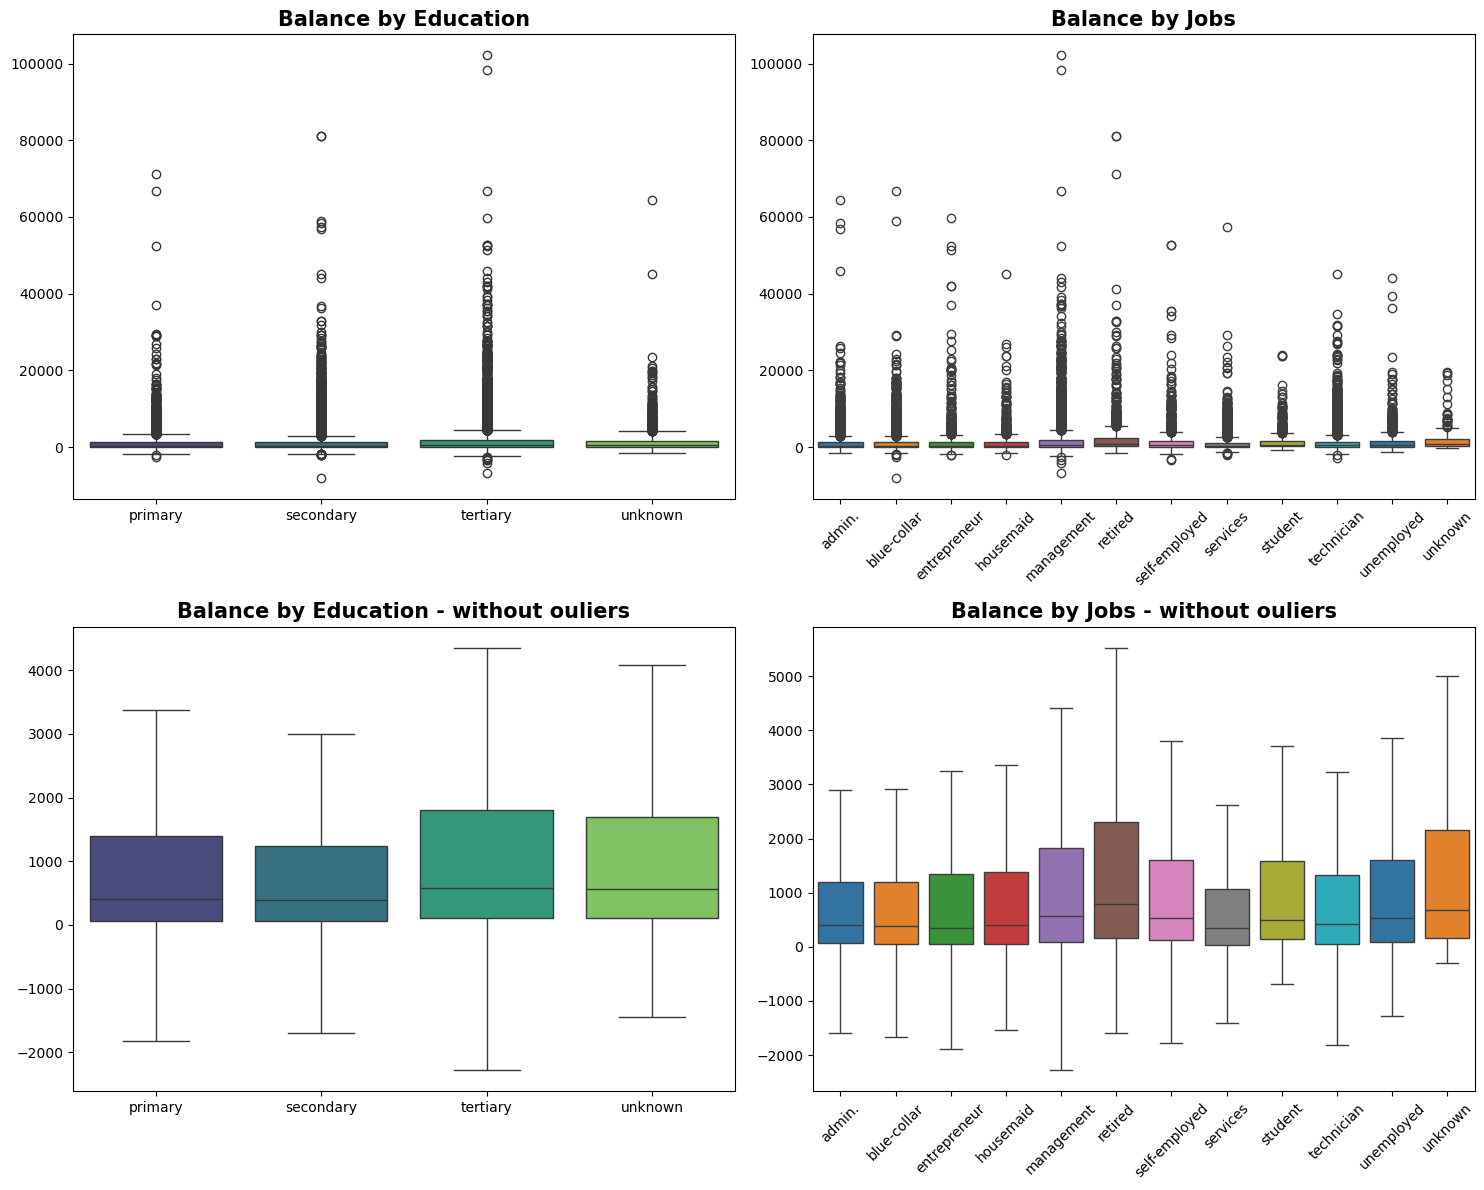

In [42]:
# Display relationship between Education, Job and Balance
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.boxplot(x=raw_train['education'], y=raw_train['balance'], palette='viridis').set(xlabel=None, ylabel=None)
plt.title('Balance by Education', fontsize=15, fontweight='bold')

plt.subplot(2,2,2)
sns.boxplot(x=raw_train['job'], y=raw_train['balance'], palette='tab10').set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.title('Balance by Jobs', fontsize=15, fontweight='bold')

plt.subplot(2,2,3)
sns.boxplot(x=raw_train['education'], y=raw_train['balance'], showfliers=False, palette='viridis').set(xlabel=None, ylabel=None)
plt.title('Balance by Education - without ouliers', fontsize=15, fontweight='bold')

plt.subplot(2,2,4)
sns.boxplot(x=raw_train['job'], y=raw_train['balance'], showfliers=False, palette='tab10').set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
plt.title('Balance by Jobs - without ouliers', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

### Previous Contact

In [43]:
# Previous contact result
pre_contact_result = raw_train.groupby(['contact', 'poutcome']).size().unstack(fill_value=0)
pre_contact_result

poutcome,failure,other,success,unknown
contact,,,,
cellular,4529,1637,1385,21734
telephone,341,176,114,2275
unknown,31,27,12,12950


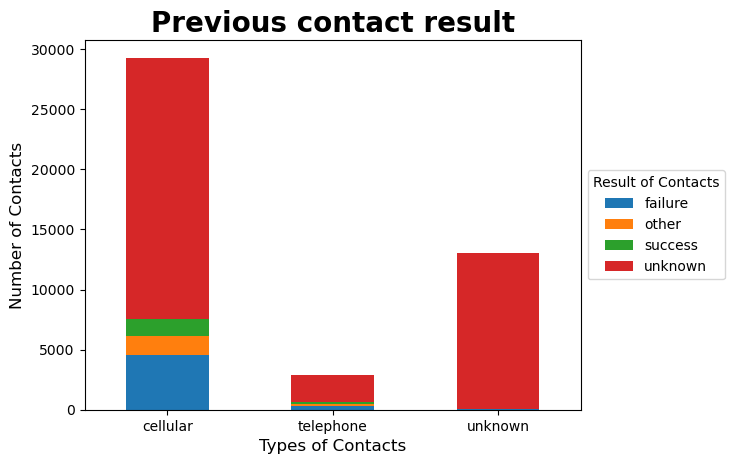

In [44]:
# Display previous contact result
pre_contact_result.plot(kind='bar', stacked=True)
plt.title('Previous contact result', fontsize=20, fontweight='bold')
plt.xlabel('Types of Contacts', fontsize=12)
plt.ylabel('Number of Contacts', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Result of Contacts', loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [45]:
# Previous contacts' details groupby
pre_contact_detail = raw_train.groupby('contact').agg(
    Total_contact = pd.NamedAgg(column='previous', aggfunc='sum'),
    Average_pdays = pd.NamedAgg(column='pdays', aggfunc='mean'),
    Average_duration = pd.NamedAgg(column='duration', aggfunc='mean')
).reset_index()
pre_contact_detail

,contact,Total_contact,Average_pdays,Average_duration
0,cellular,23547,56.885129,263.013966
1,telephone,2404,46.312801,235.366139
2,unknown,286,1.299386,252.340476


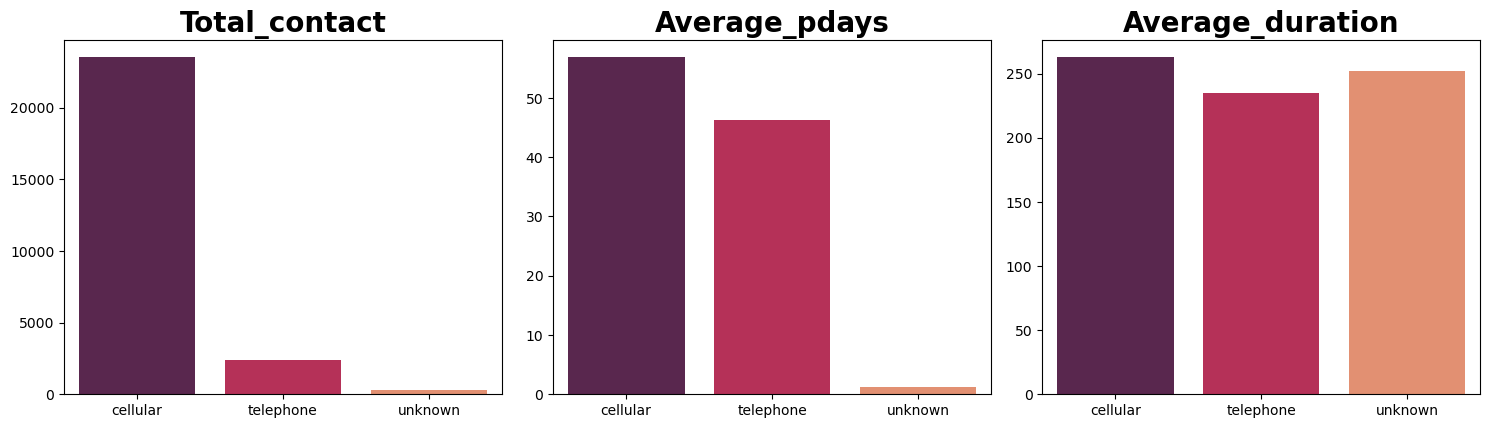

In [46]:
# Display previous contacts' details
plt.figure(figsize=(15,12))

for i in pre_contact_detail.iloc[:, 1:].columns:
    plt.subplot(3,3, pre_contact_detail.columns.get_loc(i))
    sns.barplot(x=pre_contact_detail['contact'], y=pre_contact_detail[i], 
                errorbar=None, palette='rocket').set(xlabel=None, ylabel=None)
    plt.title(i, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Training the models

In [47]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  int64   
dtypes: category(8), int32(1), int64(8)
memory usage: 3.3 MB


In [48]:
# Import relevant libraries
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss

## Prepare the data

In [49]:
# Import the test set and preprocessing
raw_test = pd.read_csv('test.csv')
preprocess(raw_test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,2,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,5,341,1,330,2,other,0
7,39,technician,married,secondary,no,147,yes,no,cellular,6,5,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,5,57,2,-1,0,unknown,0
9,43,services,married,primary,no,-88,yes,yes,cellular,17,4,313,1,147,2,failure,0


In [50]:
# Remove Duration from the data (Important note above)
raw_train = raw_train.drop('duration', axis=1)
raw_test = raw_test.drop('duration', axis=1)

In [51]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   int32   
 11  campaign   4521 non-null   int64   
 12  pdays      4521 non-null   int64   
 13  previous   4521 non-null   int64   
 14  poutcome   4521 non-null   category
 15  y          4521 non-null   int64   
dtypes: category(8), int32(1), int64(7)
memory usage: 301.8 KB


In [52]:
# Convert categorical columns into integer columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in raw_train.select_dtypes(include='category').columns.to_list():
    raw_train[i] = le.fit_transform(raw_train[i])
    raw_test[i] = le.transform(raw_test[i])

In [53]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  poutcome   45211 non-null  int32
 15  y          45211 non-null  int64
dtypes: int32(9), int64(7)
memory usage: 4.0 MB


In [54]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int32
 2   marital    4521 non-null   int32
 3   education  4521 non-null   int32
 4   default    4521 non-null   int32
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int32
 7   loan       4521 non-null   int32
 8   contact    4521 non-null   int32
 9   day        4521 non-null   int64
 10  month      4521 non-null   int32
 11  campaign   4521 non-null   int64
 12  pdays      4521 non-null   int64
 13  previous   4521 non-null   int64
 14  poutcome   4521 non-null   int32
 15  y          4521 non-null   int64
dtypes: int32(9), int64(7)
memory usage: 406.3 KB


In [55]:
# Declare the variables
x_train = raw_train.iloc[:, :-1]
y_train = raw_train.iloc[:, -1]

x_test = raw_test.iloc[:, :-1]
y_test = raw_test.iloc[:, -1]

In [56]:
# Create a function to evaluate the models
def evaluate(model):  
    # Prediction Table
    pred_table = pd.DataFrame(data=model.predict_proba(x_test)[:,1].round(2), columns=['Probability']).reset_index(drop=True)
    pred_table['Predicted Value'] = model.predict(x_test)
    pred_table['Actual Value'] = y_test.reset_index(drop=True)

    # Classfication report
    report = pd.DataFrame(classification_report(pred_table['Actual Value'], pred_table['Predicted Value'], output_dict=True))
    display(report.round(2).transpose())
    
    # Confusion Matrix
    confusion = pd.DataFrame(confusion_matrix(pred_table['Actual Value'], pred_table['Predicted Value']))
    confusion.columns=['Actual Positive', 'Actual Negative']
    confusion.index=['Predicted Positive', 'Predicted Negative']

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, pred_table['Probability'])
    auc = roc_auc_score(y_test, pred_table['Probability']).round(2)
    
    # Display plots
    fig, axs = plt.subplots(nrows = 2, figsize=(6,10))
    
    # Heatmap
    sns.heatmap(data=confusion, ax=axs[0], annot=True, fmt='d', cmap='Blues')
    axs[0].set_title('Confusion Matrix', fontsize=15, fontweight='bold')

    # ROC
    axs[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc})')
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    axs[1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    axs[1].set_title('Receiver Operating Characteristic - ROC', fontsize=15, fontweight='bold')
    axs[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()

## Random Forest Classifier

In [ ]:
# Define the model and param grid
rfc = RandomForestClassifier(random_state = 16)
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize GridSearchCV
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
grid_search_rfc = GridSearchCV(rfc, param_grid, cv=skfold, n_jobs=-1, scoring='f1', verbose=2)

In [62]:
# Fit the model
grid_search_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             estimator=RandomForestClassifier(random_state=16), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

In [63]:
# Result of the best param_grid and model
best_params_rfc = grid_search_rfc.best_params_
best_model_rfc = grid_search_rfc.best_estimator_
print("Best Parameters:", best_params_rfc)
print("Best Model:", best_model_rfc)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model: RandomForestClassifier(max_depth=20, random_state=16)


,precision,recall,f1-score,support
0,0.96,1.00,0.98,4000.00
1,1.00,0.67,0.80,521.00
accuracy,0.96,0.96,0.96,0.96
macro avg,0.98,0.83,0.89,4521.00
weighted avg,0.96,0.96,0.96,4521.00


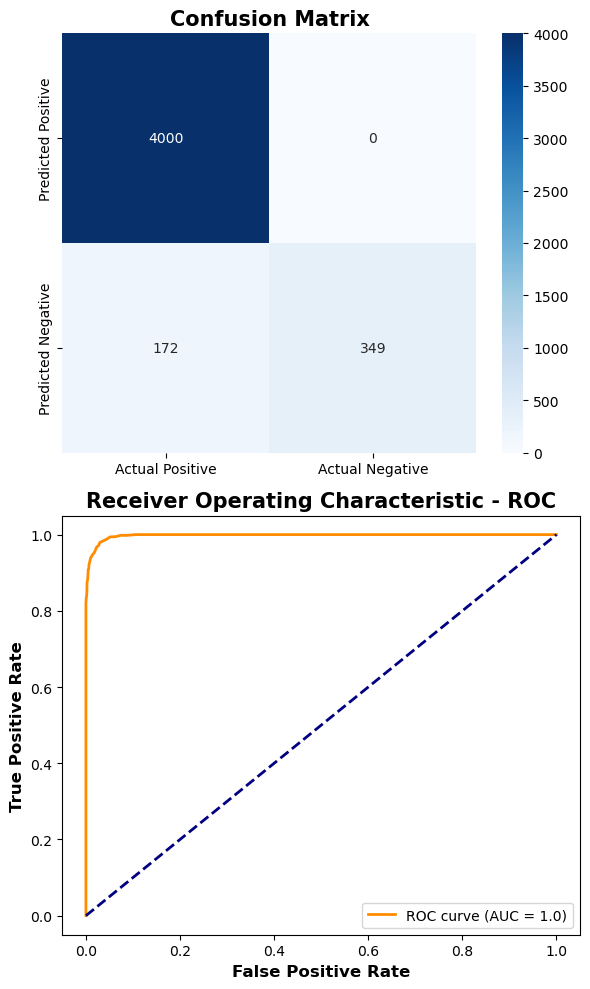

In [64]:
# Evaluate the model with best hyperparameters
evaluate(best_model_rfc)

## Gradient Boosting Classifier

In [67]:
# Define the model and param grid
gbc = GradientBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'min_samples_split': [2, 5, 10],
    'max_depth': [5, 10, 20]
}
# Initialize GridSearchCV
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
grid_search_gbc = GridSearchCV(gbc, param_grid, cv=skfold, n_jobs=-1, scoring='f1', verbose=2)

In [68]:
# Fit the model
grid_search_gbc.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=2)

In [69]:
# Result of the best param_grid and model
best_params_gbc = grid_search_gbc.best_params_
best_model_gbc = grid_search_gbc.best_estimator_
print("Best Parameters:", best_params_gbc)
print("Best Model:", best_model_gbc)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 10}
Best Model: GradientBoostingClassifier(max_depth=10, min_samples_split=10)


,precision,recall,f1-score,support
0,0.95,1.00,0.97,4000.00
1,0.98,0.57,0.72,521.00
accuracy,0.95,0.95,0.95,0.95
macro avg,0.97,0.79,0.85,4521.00
weighted avg,0.95,0.95,0.94,4521.00


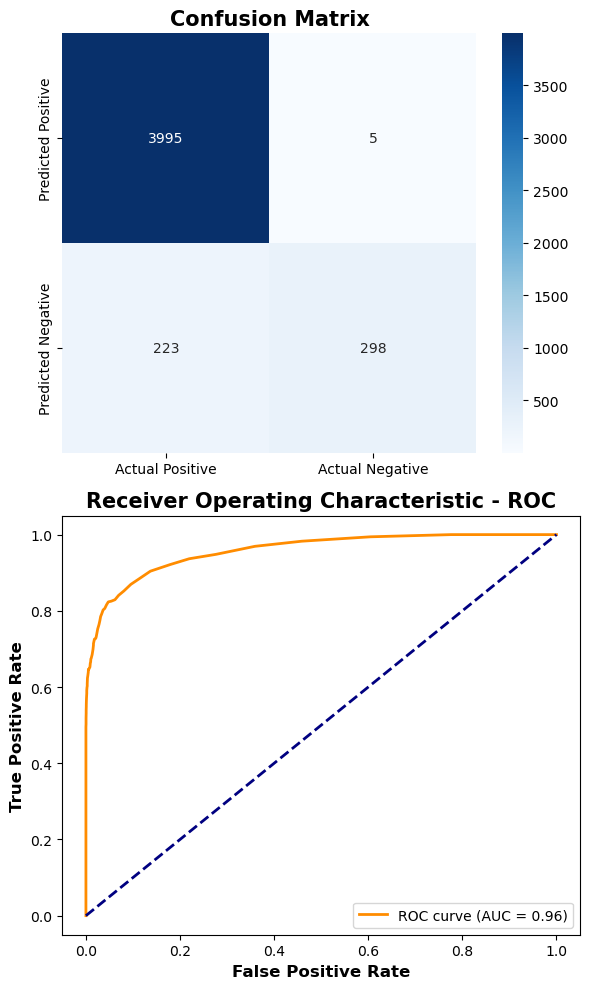

In [70]:
# Evaluate the model with best hyperparameters
evaluate(best_model_gbc)

## XGBoost Classifier

In [73]:
# Define the model and param grid
xgb = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [5, 10, 20],
    'reg_lambda': [0.1, 1, 10]
}
# Initialize GridSearchCV
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=16)
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=skfold, n_jobs=-1, scoring='f1', verbose=2)

In [74]:
# Fit the model
grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [5, 10, 20], 'reg_lambda': [0.1, 1, 10]},
             scoring='f1', verbose=2)

In [75]:
# Result of the best param_grid and model
best_params_xgb = grid_search_xgb.best_params_
best_model_xgb = grid_search_xgb.best_estimator_
print("Best Parameters:", best_params_xgb)
print("Best Model:", best_model_xgb)

Best Parameters: {'learning_rate': 1, 'max_depth': 5, 'reg_lambda': 10}
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,precision,recall,f1-score,support
0,0.93,0.99,0.96,4000.00
1,0.85,0.43,0.57,521.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.89,0.71,0.76,4521.00
weighted avg,0.92,0.93,0.91,4521.00


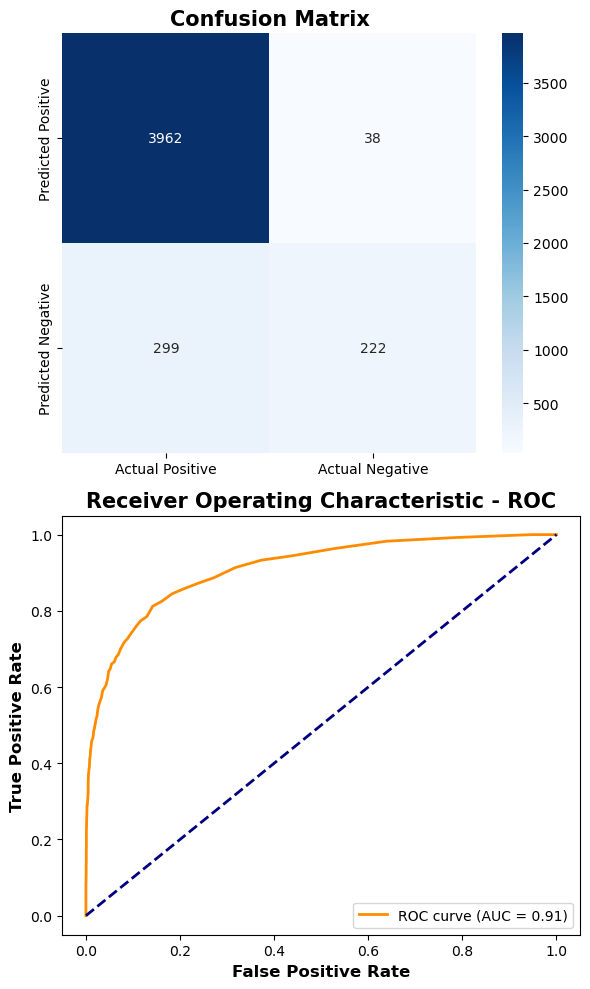

In [76]:
# Evaluate the model with best hyperparameters
evaluate(best_model_xgb)

In [82]:
# Extract feature importance
rfc_importance = best_model_rfc.feature_importances_.round(4)
gbc_importance = best_model_gbc.feature_importances_.round(4)
xgb_importance = best_model_xgb.feature_importances_.round(4)

In [89]:
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Random Forest': rfc_importance,
    'Gradient Boosting': gbc_importance,
    'XGBoost': xgb_importance
})
importance_df

,Feature,Random Forest,Gradient Boosting,XGBoost
0,age,0.1516,0.1220,0.0293
1,job,0.0690,0.0448,0.0170
2,marital,0.0281,0.0196,0.0305
3,education,0.0358,0.0216,0.0206
4,default,0.0029,0.0028,0.0117
5,balance,0.1731,0.1772,0.0199
6,housing,0.0309,0.0394,0.1175
7,loan,0.0126,0.0073,0.0306
8,contact,0.0273,0.0284,0.0828
9,day,0.1333,0.1151,0.0270


In [90]:
# Melt the DataFrame for seaborn compatibility
importance_df = importance_df.melt(id_vars='Feature', var_name='Model', value_name='Importance')
importance_df

,Feature,Model,Importance
0,age,Random Forest,0.1516
1,job,Random Forest,0.0690
2,marital,Random Forest,0.0281
3,education,Random Forest,0.0358
4,default,Random Forest,0.0029
5,balance,Random Forest,0.1731
6,housing,Random Forest,0.0309
7,loan,Random Forest,0.0126
8,contact,Random Forest,0.0273
9,day,Random Forest,0.1333


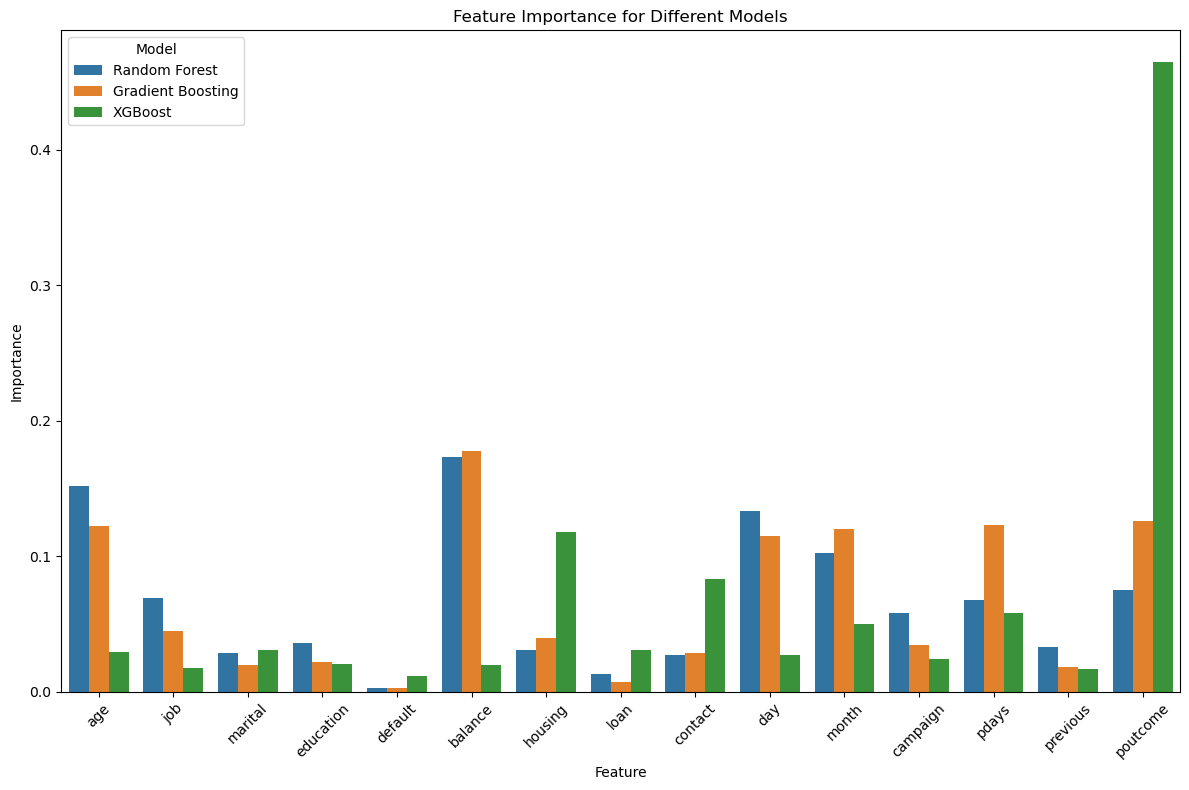

In [ ]:
# Plot the feature importances to identify crucial features
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Feature', y='Importance', hue='Model')
plt.title('Feature Importance for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()